In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
assets = ['AAPL' , 'MSFT' , 'GOOG' , 'AMZN' , 'TSLA']

In [4]:
long_data = yf.download(assets, start="2015-01-01", end="2024-01-01",auto_adjust=False)
med_data = yf.download(assets, start="2020-01-01", end="2024-01-01",auto_adjust=False)
long_data.to_csv("/home/maulik/Desktop/yfinance_long.csv" , index=False)
med_data.to_csv("/home/maulik/Desktop/yfinance_med.csv" , index=False)

[*********************100%***********************]  5 of 5 completed

2 Failed downloads:
['MSFT']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['TSLA']: Timeout('Failed to perform, curl: (28) Connection timed out after 10001 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  5 of 5 completed


In [5]:
rows_with_nan = long_data[long_data.isna().any(axis=1)]
rows_with_nan
# this shows there is no row with even a single box empty


Price        Adj Close                                         Close  \
Ticker            AAPL        AMZN        GOOG MSFT TSLA        AAPL   
Date                                                                   
2015-01-02   24.237549   15.426000   25.973845  NaN  NaN   27.332500   
2015-01-05   23.554747   15.109500   25.432404  NaN  NaN   26.562500   
2015-01-06   23.556953   14.764500   24.842955  NaN  NaN   26.565001   
2015-01-07   23.887280   14.921000   24.800392  NaN  NaN   26.937500   
2015-01-08   24.805075   15.023000   24.878592  NaN  NaN   27.972500   
...                ...         ...         ...  ...  ...         ...   
2023-12-22  191.788773  153.419998  141.657532  NaN  NaN  193.600006   
2023-12-26  191.243896  153.410004  141.756790  NaN  NaN  193.050003   
2023-12-27  191.342972  153.339996  140.387070  NaN  NaN  193.149994   
2023-12-28  191.768921  153.380005  140.228271  NaN  NaN  193.580002   
2023-12-29  190.728760  151.940002  139.880859  NaN  NaN  192.529999   

Price                                         ...        Open              \
Ticker            AMZN        GOOG MSFT TSLA  ...        AAPL        AMZN   
Date                                          ...                           
2015-01-02   15.426000   26.168653  NaN  NaN  ...   27.847500   15.629000   
2015-01-05   15.109500   25.623152  NaN  NaN  ...   27.072500   15.350500   
2015-01-06   14.764500   25.029282  NaN  NaN  ...   26.635000   15.112000   
2015-01-07   14.921000   24.986401  NaN  NaN  ...   26.799999   14.875000   
2015-01-08   15.023000   25.065184  NaN  NaN  ...   27.307501   15.016000   
...                ...         ...  ...  ...  ...         ...         ...   
2023-12-22  153.419998  142.720001  NaN  NaN  ...  195.179993  153.770004   
2023-12-26  153.410004  142.820007  NaN  NaN  ...  193.610001  153.559998   
2023-12-27  153.339996  141.440002  NaN  NaN  ...  192.490005  153.559998   
2023-12-28  153.380005  141.279999  NaN  NaN  ...  194.139999  153.720001   
2023-12-29  151.940002  140.929993  NaN  NaN  ...  193.899994  153.100006   

Price                                Volume                                
Ticker            GOOG MSFT TSLA       AAPL      AMZN      GOOG MSFT TSLA  
Date                                                                       
2015-01-02   26.378078  NaN  NaN  212818400  55664000  28951268  NaN  NaN  
2015-01-05   26.091366  NaN  NaN  257142000  55484000  41196796  NaN  NaN  
2015-01-06   25.679497  NaN  NaN  263188400  70380000  57998800  NaN  NaN  
2015-01-07   25.280592  NaN  NaN  160423600  52806000  41301082  NaN  NaN  
2015-01-08   24.831326  NaN  NaN  237458000  61768000  67071641  NaN  NaN  
...                ...  ...  ...        ...       ...       ...  ...  ...  
2023-12-22  142.130005  NaN  NaN   37149600  29514100  18513500  NaN  NaN  
2023-12-26  142.979996  NaN  NaN   28919300  25067200  11170100  NaN  NaN  
2023-12-27  142.830002  NaN  NaN   48087700  31434700  17288400  NaN  NaN  
2023-12-28  141.850006  NaN  NaN   34049900  27057000  12192500  NaN  NaN  
2023-12-29  140.679993  NaN  NaN   42672100  39823200  14881000  NaN  NaN  

[2264 rows x 30 columns]

In [6]:
adj_close = long_data['Adj Close']
long_data.describe()


Price     Adj Close                                            Close  \
Ticker         AAPL         AMZN         GOOG MSFT TSLA         AAPL   
count   2264.000000  2264.000000  2264.000000  0.0  0.0  2264.000000   
mean      81.394710    91.950540    73.063479  NaN  NaN    84.026440   
std       55.990879    48.654536    36.298158  NaN  NaN    56.034699   
min       20.604078    14.347500    24.377237  NaN  NaN    22.584999   
25%       32.814699    44.303625    41.515254  NaN  NaN    35.439376   
50%       51.220842    90.691998    59.376663  NaN  NaN    53.868752   
75%      139.017632   133.230000   104.133976  NaN  NaN   141.710003   
max      196.256577   186.570496   149.587067  NaN  NaN   198.110001   

Price                                       ...         Open               \
Ticker         AMZN         GOOG MSFT TSLA  ...         AAPL         AMZN   
count   2264.000000  2264.000000  0.0  0.0  ...  2264.000000  2264.000000   
mean      91.950540    73.611467  NaN  NaN  ...    83.956509    91.980237   
std       48.654536    36.570400  NaN  NaN  ...    55.979856    48.697243   
min       14.347500    24.560070  NaN  NaN  ...    22.500000    14.314000   
25%       44.303625    41.826625  NaN  NaN  ...    35.452501    44.243750   
50%       90.691998    59.821999  NaN  NaN  ...    54.039999    90.728249   
75%      133.230000   104.915003  NaN  NaN  ...   141.444996   133.395000   
max      186.570496   150.709000  NaN  NaN  ...   198.020004   187.199997   

Price                                Volume                                   \
Ticker         GOOG MSFT TSLA          AAPL          AMZN          GOOG MSFT   
count   2264.000000  0.0  0.0  2.264000e+03  2.264000e+03  2.264000e+03  0.0   
mean      73.563381  NaN  NaN  1.237614e+08  8.005968e+07  3.200802e+07  NaN   
std       36.551604  NaN  NaN  6.818417e+07  4.063686e+07  1.548037e+07  NaN   
min       24.664783  NaN  NaN  2.404830e+07  1.762600e+07  6.936000e+06  NaN   
25%       41.765501  NaN  NaN  7.831732e+07  5.390508e+07  2.253200e+07  NaN   
50%       59.766249  NaN  NaN  1.056556e+08  6.862200e+07  2.817000e+07  NaN   
75%      104.665127  NaN  NaN  1.486811e+08  9.332950e+07  3.659750e+07  NaN   
max      151.863495  NaN  NaN  6.488252e+08  4.771220e+08  2.232980e+08  NaN   

Price        
Ticker TSLA  
count   0.0  
mean    NaN  
std     NaN  
min     NaN  
25%     NaN  
50%     NaN  
75%     NaN  
max     NaN  

[8 rows x 30 columns]

In [7]:
#computing some basic trends
aapl = yf.Ticker("AAPL")
returns = pd.DataFrame()

#simple returns

returns['1_day_sim'] = (med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(1)) - 1
returns['5_day_sim'] = (med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(5)) - 1
returns['20_day_sim'] = (med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(20)) - 1

#log returns

returns['1_day_log'] = np.log(med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(1)) 
returns['5_day_log'] = np.log(med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(5)) 
returns['20_day_log'] = np.log(med_data["Close"]['AAPL']/med_data["Close"]['AAPL'].shift(20)) 

#rolling volatility

returns['5_rolling_volatility'] = med_data["Close"]["AAPL"].rolling(window=5).std()
returns['20_rolling_volatility'] = med_data["Close"]["AAPL"].rolling(window=20).std()
returns['60_rolling_volatility'] = med_data["Close"]["AAPL"].rolling(window=60).std()



In [8]:
returns.head(10)

,1_day_sim,5_day_sim,20_day_sim,1_day_log,5_day_log,20_day_log,5_rolling_volatility,20_rolling_volatility,60_rolling_volatility
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,NaN,NaN,-0.009770,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.007968,NaN,NaN,0.007937,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.004703,NaN,NaN,-0.004714,NaN,NaN,NaN,NaN,NaN
2020-01-08,0.016086,NaN,NaN,0.015958,NaN,NaN,0.550490,NaN,NaN
2020-01-09,0.021241,0.030897,NaN,0.021018,0.030430,NaN,1.236827,NaN,NaN
2020-01-10,0.002261,0.043372,NaN,0.002258,0.042457,NaN,1.375992,NaN,NaN
2020-01-13,0.021364,0.057238,NaN,0.021139,0.055660,NaN,1.782752,NaN,NaN
2020-01-14,-0.013503,0.047890,NaN,-0.013595,0.046779,NaN,1.254298,NaN,NaN


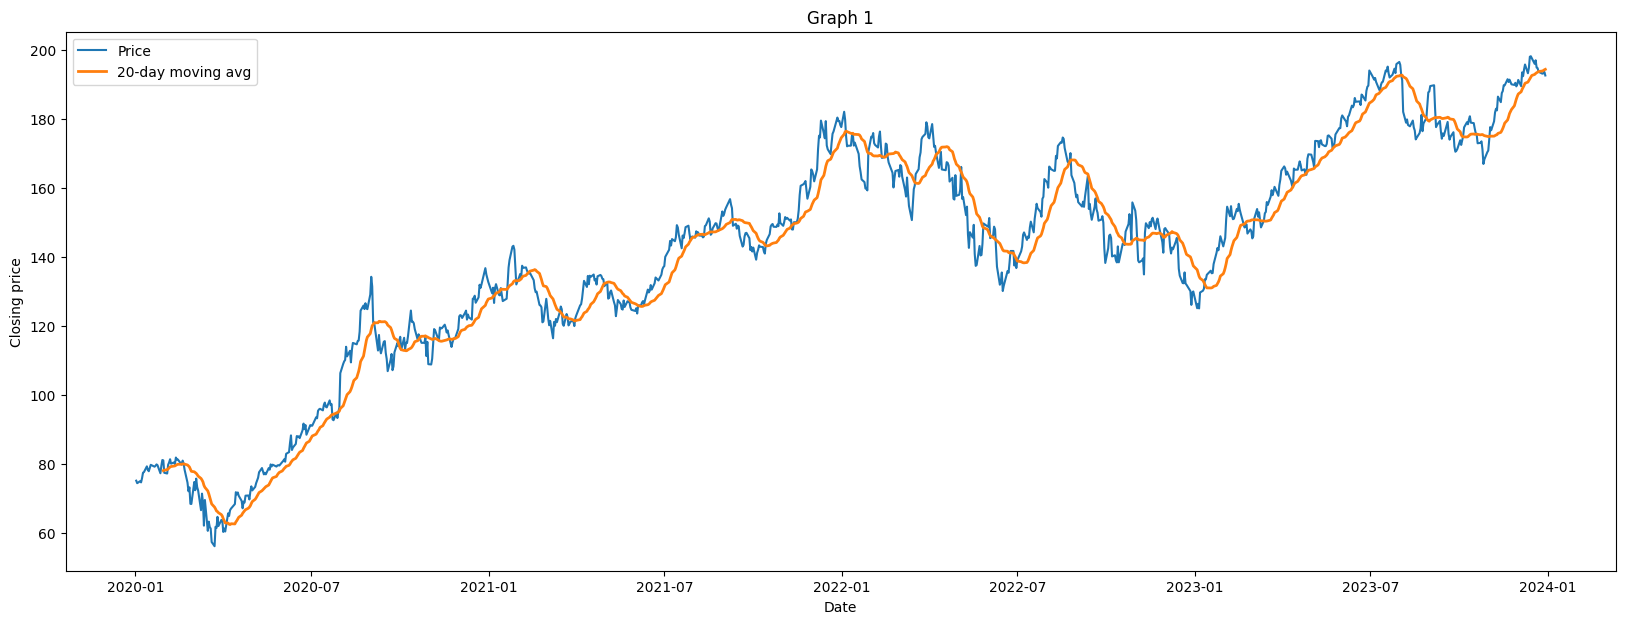

In [9]:
#Graph of price and 20-day moving avg

moving_avg = (med_data['Close']['AAPL'].rolling(window=20).sum())/20

plt.figure(figsize=(20,7))
plt.plot(med_data["Close"]['AAPL'],label='Price') #closing price 
plt.plot(moving_avg,lw=2,label = '20-day moving avg')

plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Graph 1")
plt.legend()

plt.show()

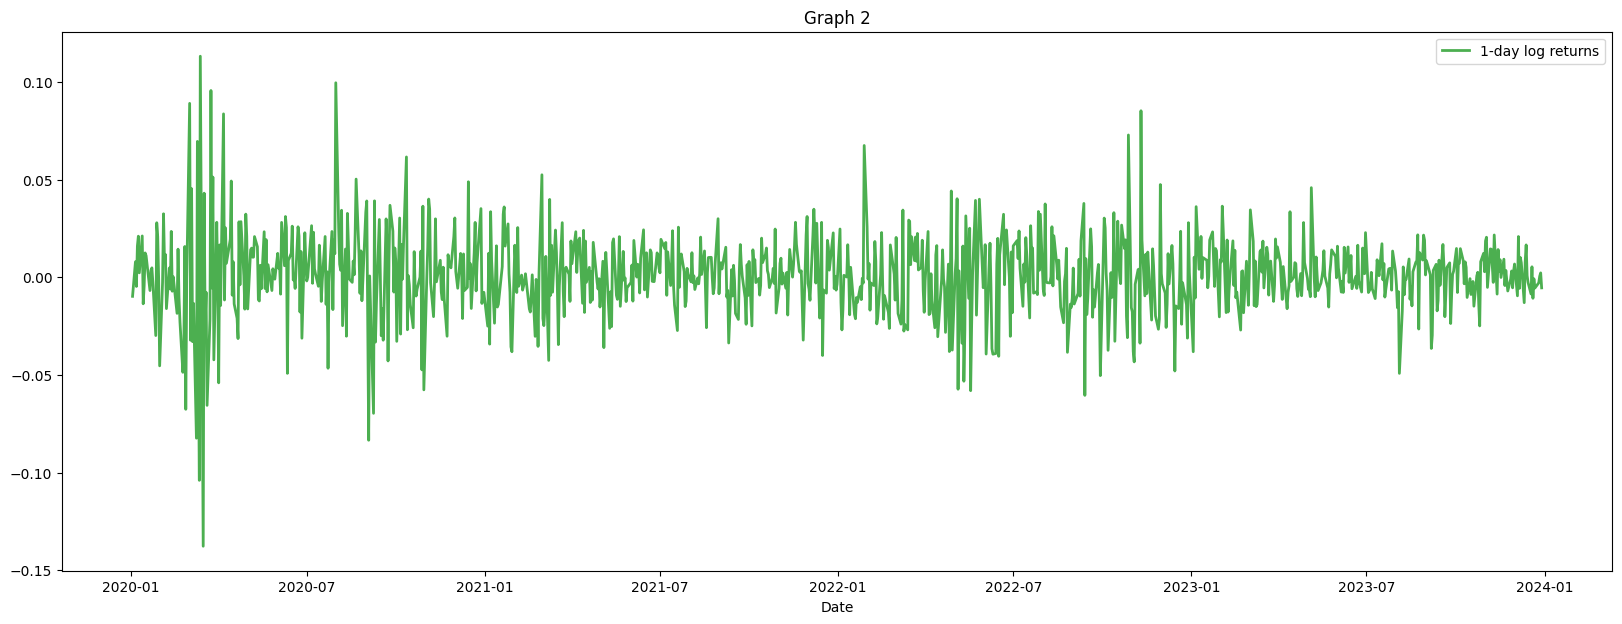

In [10]:
#Graph of 1-day log returns

plt.figure(figsize=(20,7))
plt.plot(returns['1_day_log'],lw=2,c='#4CAF50', label='1-day log returns')

plt.xlabel("Date")

plt.title("Graph 2")
plt.legend()

plt.show()

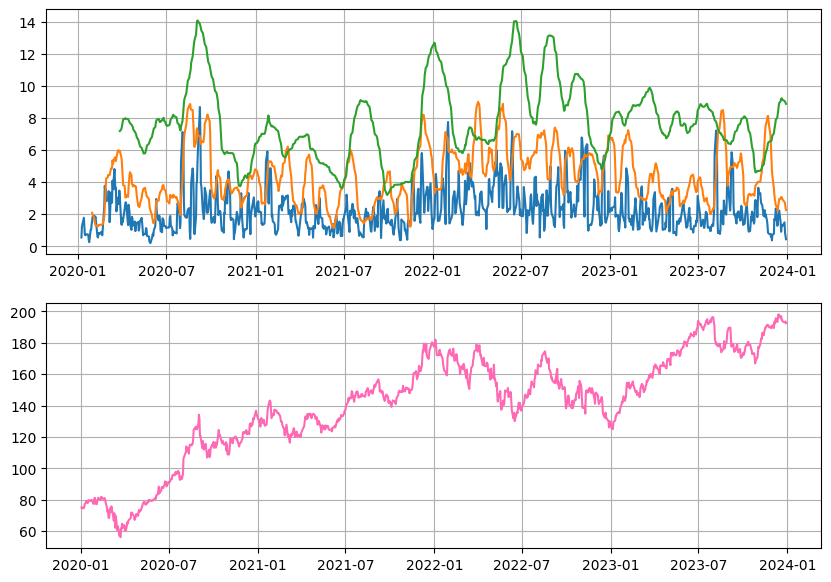

In [11]:
#rolling volatilities graph

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(returns['5_rolling_volatility'],label='5-day rolling volatility')
plt.plot(returns['20_rolling_volatility'],label='20-day rolling volatility')
plt.plot(returns['60_rolling_volatility'],label='60-day rolling volatility')
plt.grid()

plt.subplot(2,1,2)
# plt.figure(figsize=(20,7))
plt.plot(med_data["Close"]['AAPL'],label='Price',c='hotpink')
plt.grid()

# plt.xlabel("Date")
# plt.ylabel("Volatility")
# plt.title("Graph 3")
# plt.legend()

plt.show()

One trend which we can notice is that, high volatility and price drops are related. 

In [12]:
#i'll do the bonus part later

# TASK 3 STATIONARITY

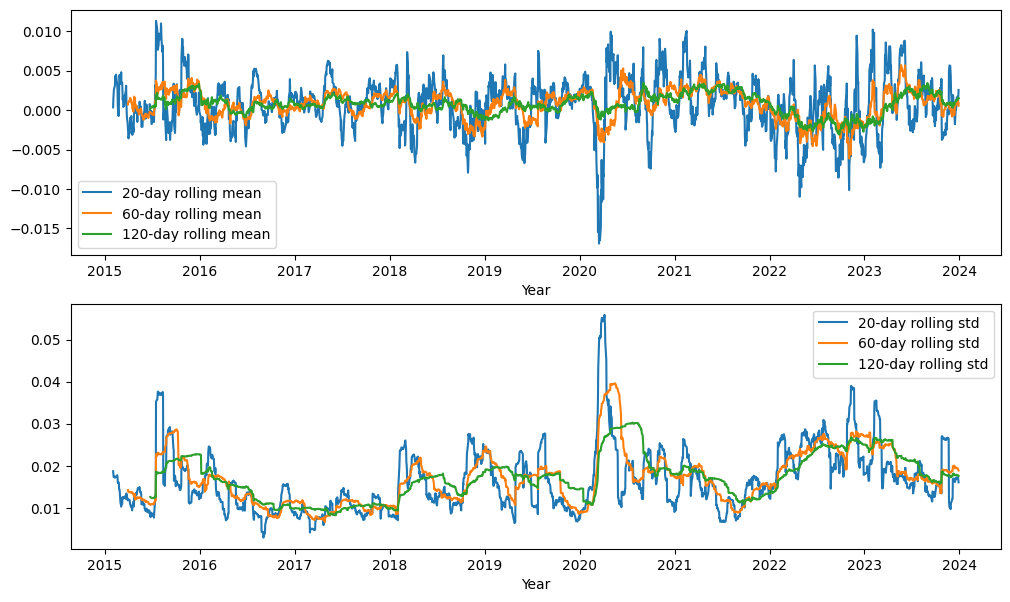

In [13]:
#TASK 3 STATIONARITY
#I'll take GOOGLE as my asset here over long term data.

google = long_data["Close"]["GOOG"]

goog_returns = pd.DataFrame()
goog_returns['1day_log_returns'] = np.log(google/google.shift(1))

#Rolling mean of window sizes 20,60,120

goog_returns['rolling_mean_20'] = (goog_returns['1day_log_returns'].rolling(window=20).sum())/20
goog_returns['rolling_mean_60'] = (goog_returns['1day_log_returns'].rolling(window=60).sum())/60
goog_returns['rolling_mean_120'] = (goog_returns['1day_log_returns'].rolling(window=120).sum())/120

#rolling std of window 20,60,120
goog_returns['rolling_std_20'] = goog_returns['1day_log_returns'].rolling(window=20).std()
goog_returns['rolling_std_60'] = goog_returns['1day_log_returns'].rolling(window=60).std()
goog_returns['rolling_std_120'] = goog_returns['1day_log_returns'].rolling(window=120).std()

#plot of rolling mean and rolling std

plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(goog_returns['rolling_mean_20'], label='20-day rolling mean')
plt.plot(goog_returns['rolling_mean_60'], label='60-day rolling mean')
plt.plot(goog_returns['rolling_mean_120'], label='120-day rolling mean')

plt.xlabel('Year')
plt.legend()



plt.subplot(2,1,2)
plt.plot(goog_returns['rolling_std_20'],label = '20-day rolling std')
plt.plot(goog_returns['rolling_std_60'],label = '60-day rolling std')
plt.plot(goog_returns['rolling_std_120'],label = '120-day rolling std')

plt.xlabel('Year')
plt.legend()



In [14]:
diff = goog_returns['rolling_mean_120'].max() - goog_returns['rolling_mean_120'].min()
diff



np.float64(0.006574867698426721)

In [15]:
diff = goog_returns['rolling_std_120'].max() - goog_returns['rolling_std_120'].min()
diff



np.float64(0.022010944475116236)

 we can see the difference between the max and min value of mean over 120 days, is almost negligible.

 Difference in std is also less but not negligible as in the case of rolling mean

# ADF TEST

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
#I'll be running the ADF test on google's log returns.

adf_result = adfuller(goog_returns['1day_log_returns'].dropna())

adf_stats = adf_result[0]
p_value = adf_result[1]

print(p_value < 0.05)

True


I get the output as True, hence we can reject the H0 hypothesis, and conclude that our returns are stationary(donot have a unit root).

# TASK 4

I'll use AMAZON for this task, lets see what unfolds.

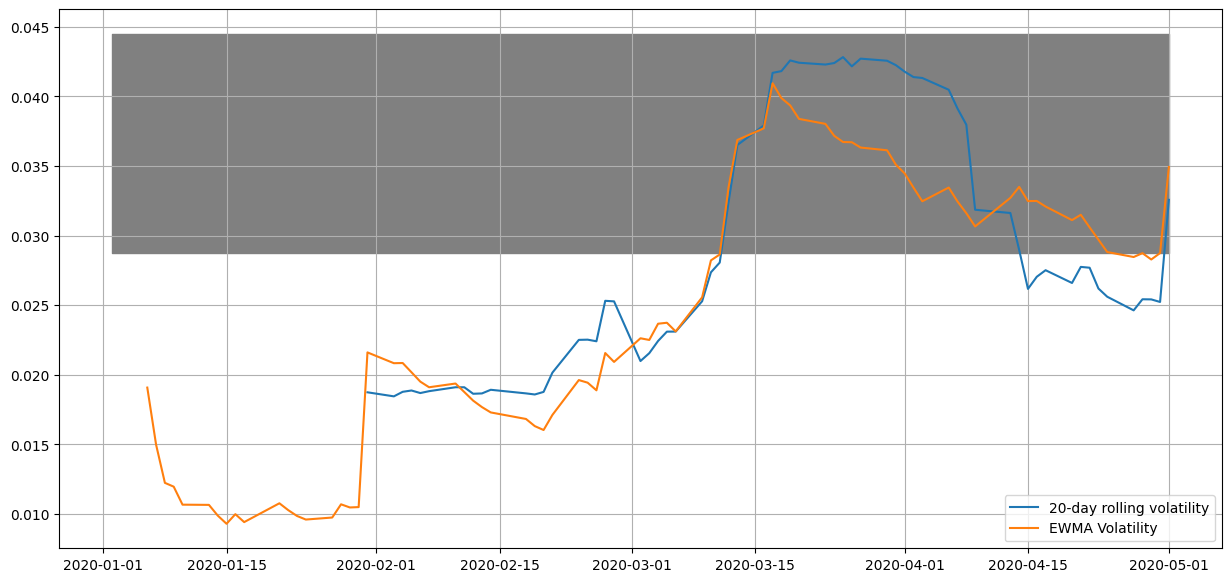

In [27]:
#taking data from the covid crash, jan to april
covid_data = long_data.loc['2020-01-01':'2020-05-01']
stats_amzn_covid = pd.DataFrame()
stats_amzn_covid['log_returns'] = np.log(covid_data['Close']['AMZN']/covid_data['Close']['AMZN'].shift(1))
stats_amzn_covid['20-day_volatility'] = stats_amzn_covid['log_returns'].rolling(20).std()
stats_amzn_covid['EWMA_volatility'] = stats_amzn_covid['log_returns'].ewm(alpha=0.06,adjust=False).std()

#Plotting on graph
plt.figure(figsize=(15,7))
plt.plot(stats_amzn_covid['20-day_volatility'],label = '20-day rolling volatility')
plt.plot(stats_amzn_covid['EWMA_volatility'],label = 'EWMA Volatility')

plt.legend()
plt.grid()

#Regime detection - 60 %ile 
threshold_60 = stats_amzn_covid['EWMA_volatility'].quantile(0.6)
plt.fill_between(stats_amzn_covid.index,threshold_60,plt.gca().get_ylim()[1],color = 'grey')


1. Both the graphs have almost the same smoothness.
2. the EWMA crash reacted faster to the sudden crash, see carefully near 1st March, the orange line ascends, whereas the blue line descends. and it gains its peak way before the blue line's plateau. 
3. Thus we can conclude for risk management, EWMA volatility is better than 20-day volatility.

Variance of Graph 1 is 1.403520537752792.
Variance of Graph 2 is 1.2224541477959776.


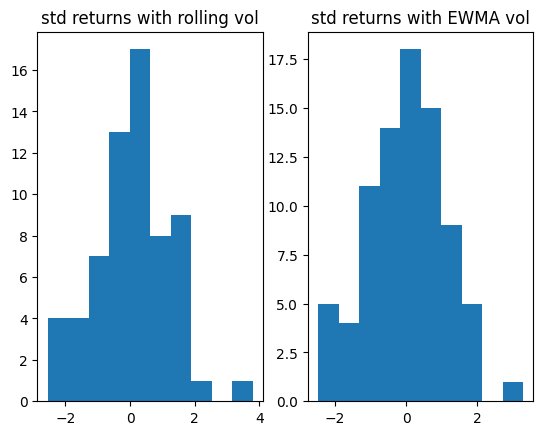

In [33]:
#Bonus part of the TASK 4

#I have defined two stnd returns based on EWMA volatility and rolling volatility.
stats_amzn_covid['std_returns_EWMA'] = stats_amzn_covid['log_returns']/stats_amzn_covid['EWMA_volatility']
stats_amzn_covid['std_returns_rolling'] = stats_amzn_covid['log_returns']/stats_amzn_covid['20-day_volatility']

var_EWM = (stats_amzn_covid['std_returns_EWMA'].std())**2
var_rolling = (stats_amzn_covid['std_returns_rolling'].std())**2

#plotting histogram
plt.subplot(1,2,1)
plt.hist(stats_amzn_covid['std_returns_rolling'])
plt.title('std returns with rolling vol')

plt.subplot(1,2,2)
plt.hist(stats_amzn_covid['std_returns_EWMA'])
plt.title('std returns with EWMA vol')

print(f'Variance of Graph 1 is {var_rolling}.')
print(f'Variance of Graph 2 is {var_EWM}.')


**Since we know the model with var nearer to 1 is a good model, hence EWMA model is better than the 20-day rolling model.**